In [133]:
import Pkg; Pkg.activate("..")

  Activating project at `~/SAFT_ML`


In [134]:
using CSV, DataFrames, DelimitedFiles, Clapeyron, PyCall
import PyPlot; const plt = PyPlot ;

In [135]:
pcp_source_params = CSV.read("../pcpsaft_params/training_data.csv", DataFrame, header=1) ;

In [136]:
header_names = ["epoch", "species", "m", "σ", "λ_a", "λ_r", "ϵ"]
raw_params = CSV.File("../params_log.csv"; header=header_names) |> DataFrame

Row,epoch,species,m,σ,λ_a,λ_r,ϵ
,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,1,hexane,2.58658,3.56519,6.0,11.3481,256.519
2,1,decane,2.58676,3.56538,6.0,11.3462,256.538
3,1,n-butane,2.58655,3.56516,6.0,11.3484,256.516
4,1,"2,4-dimethylpentane",2.58677,3.5654,6.0,11.346,256.54
5,1,dodecane,2.58686,3.56548,6.0,11.3452,256.548
6,2,hexane,2.65193,3.63233,6.0,10.6585,263.305
7,2,decane,2.65093,3.6313,6.0,10.669,263.201
8,2,n-butane,2.65153,3.63192,6.0,10.6627,263.263
9,2,"2,4-dimethylpentane",2.65128,3.63166,6.0,10.6653,263.238


In [137]:
unique_values = unique(raw_params[!, :species])
num_rows = length(unique_values)

processed_data = DataFrame(
    species = fill(missing, num_rows),
    Mw = fill(0.0, num_rows),
    m = fill([0.0], num_rows), 
    σ = fill([0.0], num_rows),
    λ_a = fill([0.0], num_rows),
    λ_r = fill([0.0], num_rows),
    ϵ = fill([0.0], num_rows)
) ;

processed_data.species = unique_values 

5-element Vector{String31}:
 "hexane"
 "decane"
 "n-butane"
 "2,4-dimethylpentane"
 "dodecane"

In [138]:
for i in unique_values
    raw_params_spec = filter(row -> contains(row.species, i), raw_params)
    num_epochs = nrow(raw_params_spec)

    row_number_processed = findall(isequal(i), processed_data.species)
    row_number_source = findall(isequal(i), pcp_source_params.species)

    processed_data[row_number_processed,:m] = [[raw_params_spec[i,:m] for i = 1:num_epochs]]
    processed_data[row_number_processed,:σ] = [[raw_params_spec[i,:σ] for i = 1:num_epochs]]
    processed_data[row_number_processed,:ϵ] = [[raw_params_spec[i,:ϵ] for i = 1:num_epochs]]
    processed_data[row_number_processed,:λ_a] = [[raw_params_spec[i,:λ_a] for i = 1:num_epochs]]
    processed_data[row_number_processed,:λ_r] = [[raw_params_spec[i,:λ_r] for i = 1:num_epochs]]
    
    processed_data[row_number_processed,:Mw] = pcp_source_params[row_number_source,:Mw]
end

processed_data = sort(processed_data, :Mw) ;


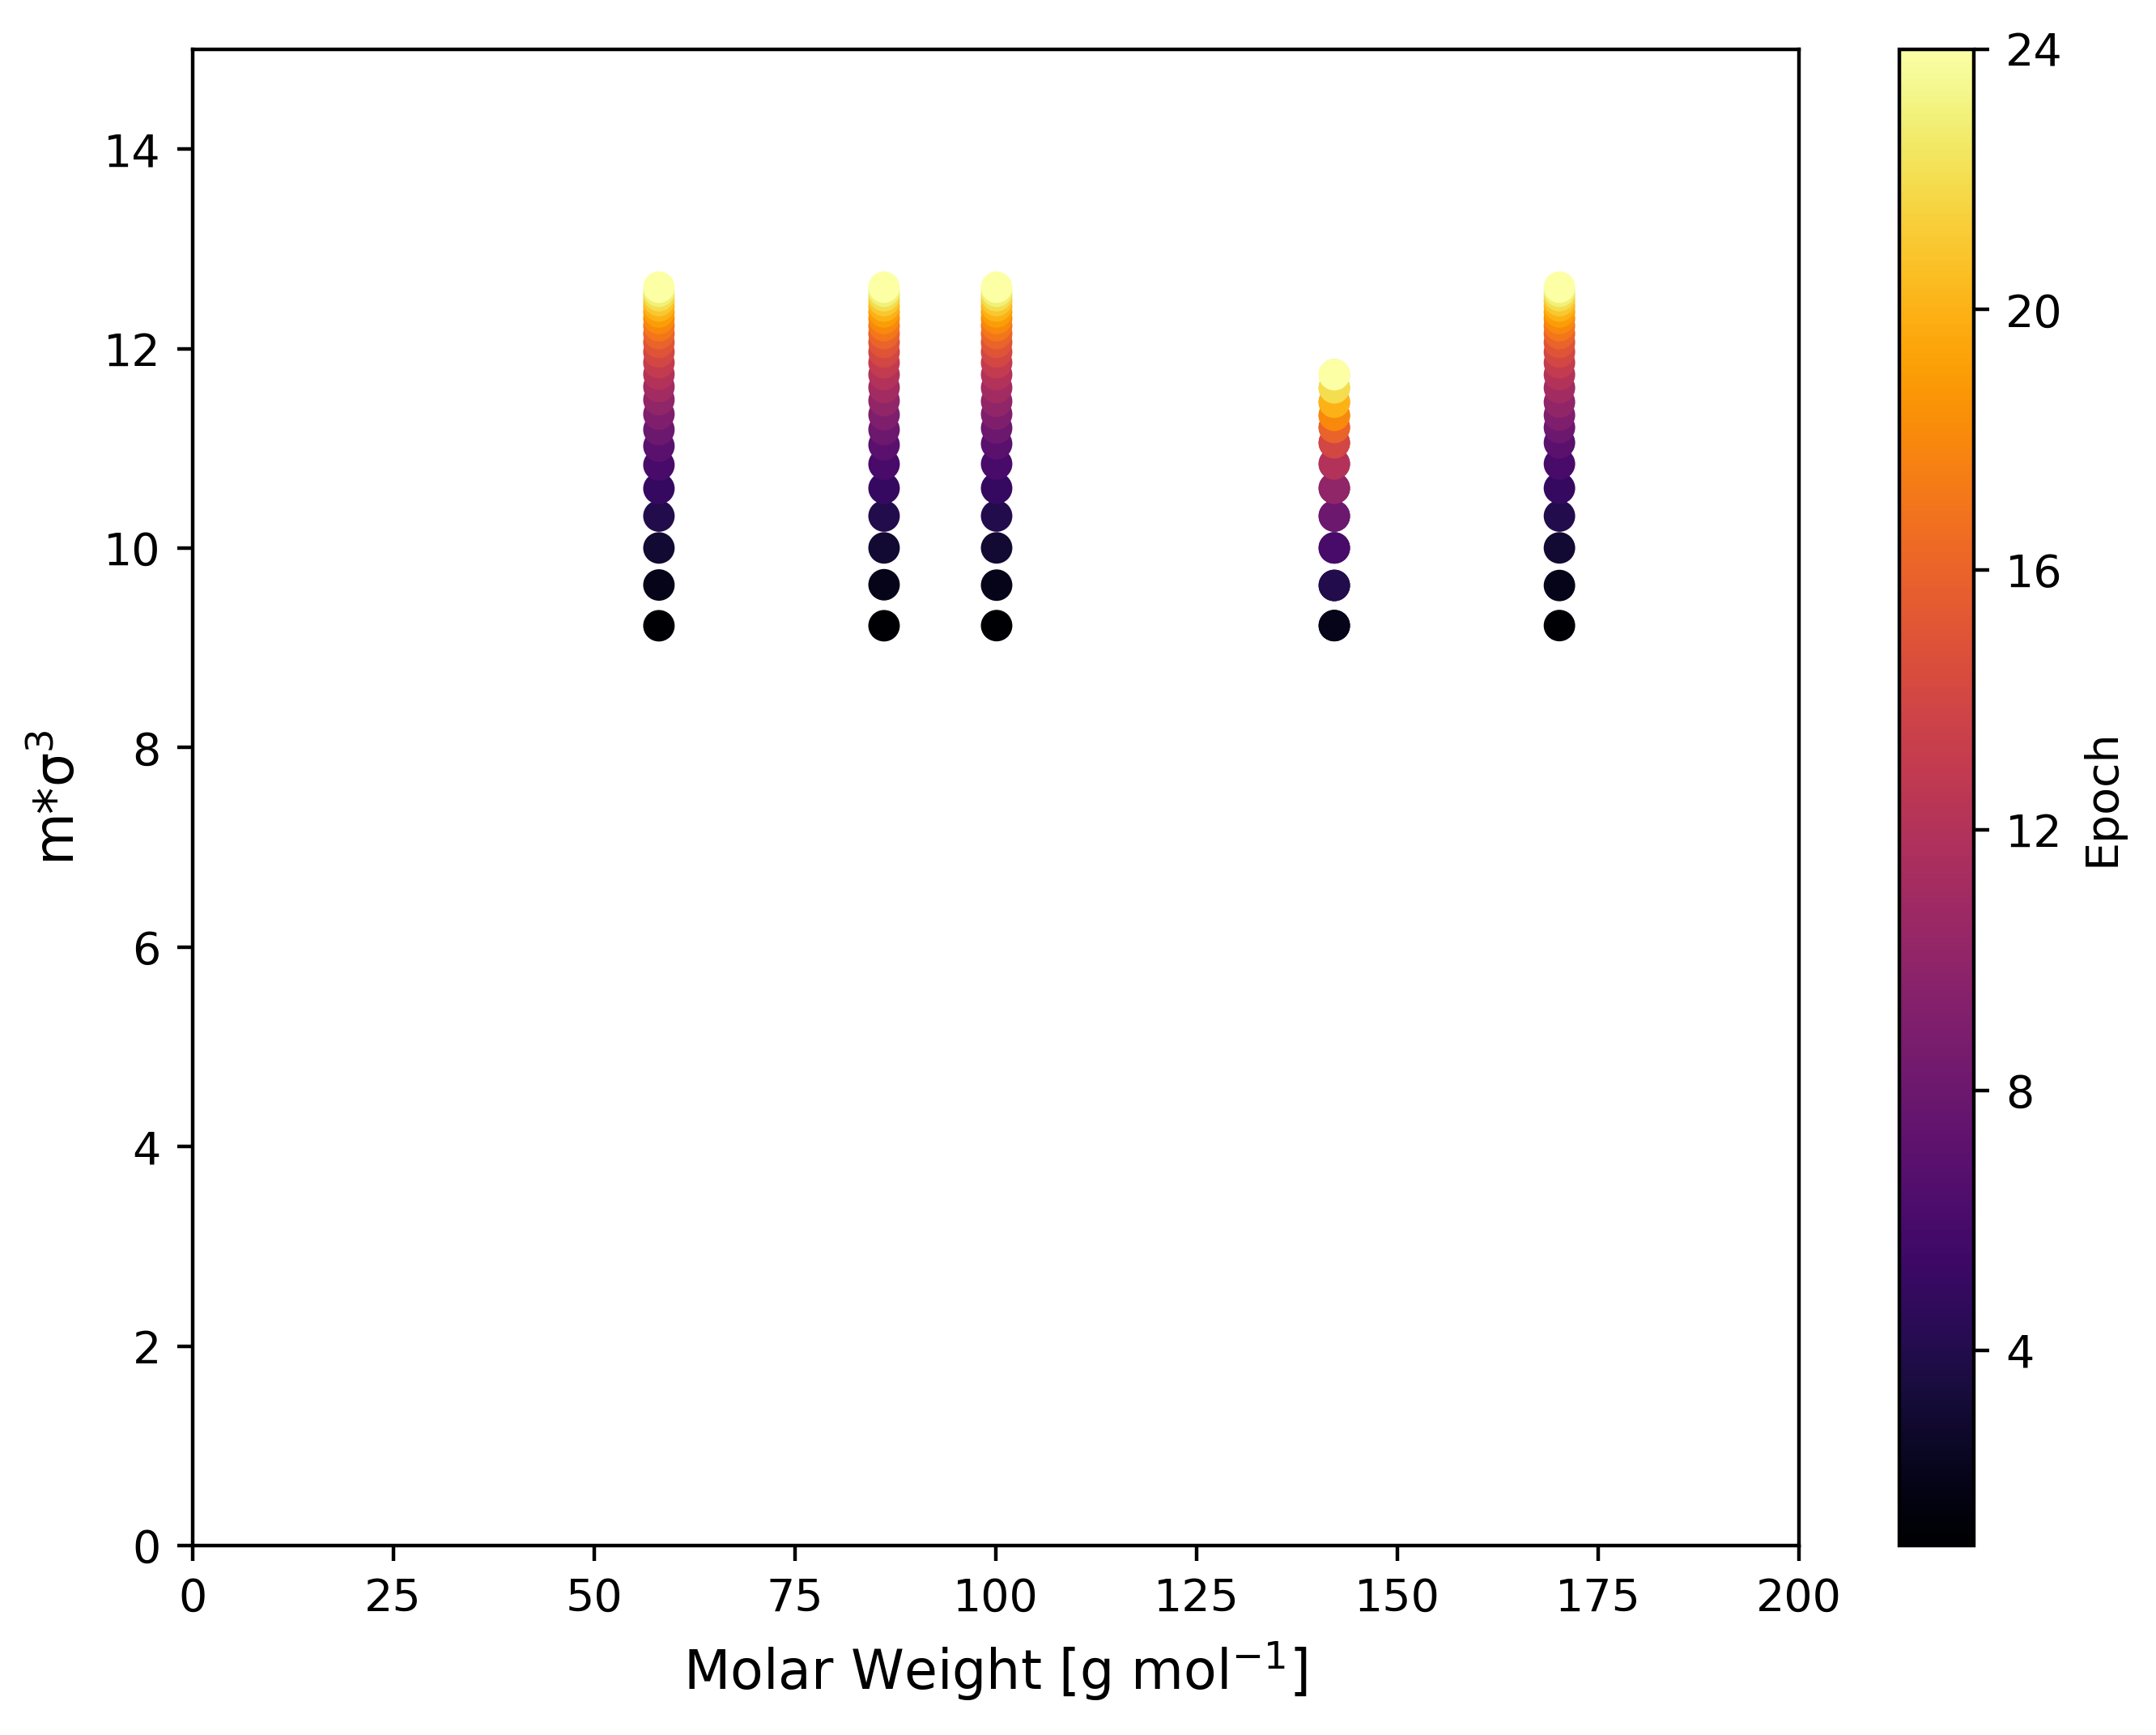

In [197]:
num_epochs = length(processed_data[1,:m])

plt.figure(figsize=(8, 6), dpi=400)

for j = 1:nrow(processed_data)

    mol_weight = fill(processed_data[j,:Mw], num_epochs)
    ms = processed_data[j,:m]
    σs = processed_data[j,:σ]

    m_sigmacubed = [ms[i]*σs[i] for i in 1:num_epochs]

    plt.scatter(mol_weight, m_sigmacubed, c=color_mapping, cmap="inferno")
end

plt.colorbar(ticks = 0:4:24,label = "Epoch")

plt.xlabel("Molar Weight [g mol\$^{-1}\$]",fontsize=12)
plt.ylabel("m*σ\$^3\$",fontsize=12)
plt.ylim([0,15])
plt.xlim([0,200]) ;

# for i = 1:nrows_data
#     plt.semilogx(1 ./filtered_training_data[i,:sat_volumes_vap_m3_per_mol],filtered_training_data[i,:sat_temperatures_K],color = [colour_grad_1[i] 0 colour_grad_2[i]])
# end


# plt.savefig("all_compound_phase_envelopes.png",dpi=400)